
----
# Cuaderno 3 - Transformación de datos: el primer paso hacia el modelo
## Ariel Palazzesi - 2026
----

En este cuaderno usaremos un dataset real: el famoso conjunto de datos del **Titanic**, que contiene información sobre los pasajeros que viajaban en el barco y si sobrevivieron o no al hundimiento.

Este conjunto de datos es ideal para poner en práctica tareas como:
- Identificación y transformación de variables categóricas.
- Normalización y estandarización de variables numéricas.
- Detección y tratamiento de valores atípicos.


## Cómo usar el dataset

Vamos a trabajar con el archivo `Titanic-Dataset.csv`, disponible en Kaggle. Para cargarlo en este cuaderno:

1. Descargá el archivo desde:  
👉 https://www.kaggle.com/datasets/yasserh/titanic-dataset  
2. Subilo directamente al entorno de Colab usando el botón del panel lateral izquierdo:  
   **Archivos > Subir > Titanic-Dataset.csv**
3. Una vez subido, ejecutá el siguiente bloque de código para cargar los datos.


In [10]:
# Importamos las librerías fundamentales para análisis y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo para gráficos de Seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Cargamos el archivo Titanic-Dataset.csv desde la carpeta de archivos de Colab
ruta = '/content/Titanic-Dataset.csv'
df = pd.read_csv(ruta)

# Mostramos las primeras filas del dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Identificación de tipos de variables

Antes de aplicar cualquier transformación a nuestro conjunto de datos, es importante identificar qué tipo de información contiene cada columna. Esto nos permitirá tomar mejores decisiones sobre qué técnica utilizar para cada variable.

En general, vamos a encontrar:

- **Variables categóricas**: contienen valores como texto o categorías (por ejemplo: "male", "female", "S", "C", "Q"...).
- **Variables numéricas**: contienen números con los que se pueden hacer operaciones matemáticas (por ejemplo: edad, tarifa, cantidad de familiares a bordo).
- **Otras columnas** que tal vez no aporten al modelo (como nombres, IDs o tickets), y que analizaremos más adelante.

A continuación, ejecutamos un bloque de código que detecta automáticamente qué variables son categóricas y cuáles son numéricas.


In [11]:
# Detectamos variables categóricas y numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Mostramos los resultados
print(f"Variables categóricas ({len(cat_cols)}):")
print(cat_cols)
print("\nVariables numéricas ({len(num_cols)}):")
print(num_cols)


Variables categóricas (5):
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Variables numéricas ({len(num_cols)}):
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Como resultado, ahora tenemos una lista de columnas categóricas y otra de columnas numéricas.

Esta clasificación va a ser fundamental para los próximos pasos, en los que aplicaremos transformaciones específicas según el tipo de dato: codificación para las categóricas, escalado para las numéricas, etc.

Más adelante también analizaremos si hay columnas que podrían descartarse por no aportar información útil al modelo.

>  Recordá: no todas las variables categóricas vienen en formato texto (a veces los números también representan categorías), y no todos los números significan magnitudes continuas. Siempre es clave revisar los datos con criterio.


## Transformación de variables categóricas

Ahora que identificamos las columnas categóricas, es momento de transformarlas en un formato que los algoritmos de Machine Learning puedan interpretar.

Los modelos no entienden texto: necesitan variables numéricas. Por eso, debemos aplicar técnicas de **codificación** a las columnas que contienen categorías.

Las dos formas más comunes de codificación son:

- **Label Encoding**: asigna un número entero a cada categoría. Útil cuando hay **orden lógico** entre las categorías (por ejemplo: bajo < medio < alto).
- **One-Hot Encoding**: crea una nueva columna para cada categoría posible, con valores 1 o 0. Ideal para variables **nominales** (sin orden), como nombres de ciudades o tipos de producto.

A continuación aplicamos un ejemplo de cada una.


In [12]:
# Usamos la columna Pclass como ejemplo de variable categórica ordinal
print("Valores únicos en 'Pclass':", df['Pclass'].unique())

# Por ahora, ya está codificada como número, pero es útil reforzar que representa categorías ordenadas
# Podemos renombrarla como texto para mostrar cómo sería el proceso completo

df['Pclass_str'] = df['Pclass'].astype(str)

# Aplicamos Label Encoding manual
label_map = {'1': 0, '2': 1, '3': 2}
df['Pclass_encoded'] = df['Pclass_str'].map(label_map)

print("\nPrimeras filas con codificación de 'Pclass':")
df[['Pclass', 'Pclass_str', 'Pclass_encoded']].head()


Valores únicos en 'Pclass': [3 1 2]

Primeras filas con codificación de 'Pclass':


,Pclass,Pclass_str,Pclass_encoded
0,3,3,2
1,1,1,0
2,3,3,2
3,1,1,0
4,3,3,2


En este ejemplo, usamos la columna `Pclass`, que representa la clase del pasajero en el barco: 1ra, 2da o 3ra. Como existe un orden jerárquico entre estas categorías, **aplicamos Label Encoding** para reflejarlo en forma numérica.

Aunque ya estaba codificada como número, hicimos el proceso explícitamente para mostrar cómo se haría con una variable ordinal representada como texto.


In [13]:
# Hacemos una copia del DataFrame para no modificar el original
df_temp = df.copy()

# Aplicamos One-Hot Encoding y guardamos solo las nuevas columnas
embarked_dummies = pd.get_dummies(df_temp['Embarked'], prefix='Embarked', drop_first=False)

# Concatenamos las nuevas columnas al DataFrame original
df_temp = pd.concat([df_temp, embarked_dummies], axis=1)

# Mostramos la columna original y las nuevas codificadas
df_temp[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()


,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,False,False,True
1,C,True,False,False
2,S,False,False,True
3,S,False,False,True
4,S,False,False,True


En este caso aplicamos **One-Hot Encoding** a la columna `Embarked`, que indica desde qué puerto embarcó cada pasajero. Como se trata de una variable **nominal**, sin orden entre sus categorías, esta técnica es la más apropiada.

Cada puerto ("C", "Q", "S") se transformó en una nueva columna con valores binarios que indican si un pasajero embarcó o no en ese puerto. Esta forma de codificación es ideal cuando el modelo no debe asumir ninguna relación jerárquica entre las categorías.


## Escalado de variables numéricas

Una vez que nuestras variables categóricas fueron codificadas correctamente, pasamos a un paso crucial en la preparación de los datos: **ajustar la escala de las variables numéricas**.

¿Por qué? Porque muchos algoritmos de Machine Learning —como la `regresión logística`, `KNN` o `SVM`— se ven fuertemente afectados si algunas variables tienen valores mucho más grandes que otras. Esto puede provocar que el modelo le dé mayor importancia a variables solo porque tienen valores más altos, aunque no sean más relevantes.

Para evitar este problema, existen dos técnicas principales:

- **Normalización (Min-Max Scaling)**: transforma los valores para que queden en un rango entre 0 y 1.
- **Estandarización (Z-score Scaling)**: ajusta los valores para que tengan media 0 y desviación estándar 1.

Vamos a aplicar ambas sobre distintas variables del dataset del Titanic.


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una copia del dataframe temporal para aplicar escalado
df_scaled = df_temp.copy()

# Seleccionamos columnas a normalizar
columnas_a_normalizar = ['Age', 'Fare']

# Instanciamos y aplicamos el MinMaxScaler
scaler = MinMaxScaler()
df_scaled[['Age_normalizada', 'Fare_normalizada']] = scaler.fit_transform(df_scaled[columnas_a_normalizar])

# Mostramos los resultados
df_scaled[['Age', 'Age_normalizada', 'Fare', 'Fare_normalizada']].head()


,Age,Age_normalizada,Fare,Fare_normalizada
0,22.0,0.271174,7.2500,0.014151
1,38.0,0.472229,71.2833,0.139136
2,26.0,0.321438,7.9250,0.015469
3,35.0,0.434531,53.1000,0.103644
4,35.0,0.434531,8.0500,0.015713


En este ejemplo, normalizamos las columnas `Age` y `Fare` para que sus valores queden entre 0 y 1.

Esto es especialmente útil cuando los modelos que vamos a usar dependen de cálculos de distancia o están muy influenciados por las magnitudes de los datos (como KNN o clustering).


In [15]:
from sklearn.preprocessing import StandardScaler

# Creamos otro dataframe para trabajar la estandarización
df_estandarizado = df_temp.copy()

# Instanciamos el escalador estándar
scaler_std = StandardScaler()

# Aplicamos estandarización a las mismas columnas
df_estandarizado[['Age_estandarizada', 'Fare_estandarizada']] = scaler_std.fit_transform(df_estandarizado[['Age', 'Fare']])

# Mostramos los resultados
df_estandarizado[['Age', 'Age_estandarizada', 'Fare', 'Fare_estandarizada']].head()


,Age,Age_estandarizada,Fare,Fare_estandarizada
0,22.0,-0.530377,7.2500,-0.502445
1,38.0,0.571831,71.2833,0.786845
2,26.0,-0.254825,7.9250,-0.488854
3,35.0,0.365167,53.1000,0.420730
4,35.0,0.365167,8.0500,-0.486337


Aquí aplicamos **estandarización** a las mismas columnas (`Age` y `Fare`), transformando los valores para que tengan media cero y desviación estándar uno.

Este tipo de escalado es especialmente útil en modelos como regresión logística, redes neuronales o SVM, que funcionan mejor cuando los datos tienen distribución centrada y comparable.

> **En general:** si no sabés qué técnica usar, estandarizar es una buena primera opción.


## Detección de valores atípicos (outliers)

Los valores atípicos, o *outliers*, son datos que se alejan significativamente del comportamiento general de una variable. Pueden ser errores de carga, casos excepcionales, o registros válidos pero inusuales.

Detectarlos es importante porque pueden distorsionar las métricas del análisis y el entrenamiento de los modelos, sobre todo en aquellos que son sensibles a las distancias o a los extremos.

Una forma visual de detectar outliers es con **boxplots**, que nos muestran la distribución de los valores y señalan con puntos o asteriscos los posibles valores atípicos. También podemos hacerlo con métodos estadísticos, como el cálculo del **rango intercuartílico (IQR)**.


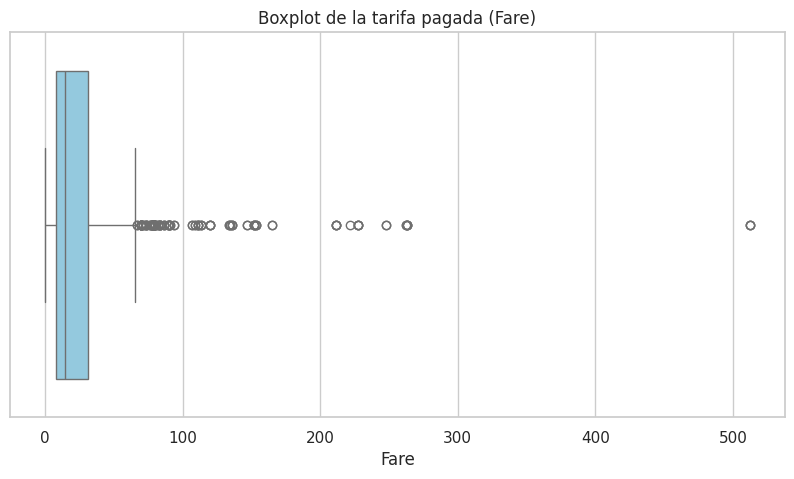

In [16]:
# Boxplot de la variable Fare para visualizar outliers
sns.boxplot(x=df['Fare'], color='skyblue')
plt.title('Boxplot de la tarifa pagada (Fare)')
plt.xlabel('Fare')
plt.show()


El gráfico muestra la distribución de la variable `Fare` (la tarifa pagada por cada pasajero). Los puntos alejados del "cajón" central son candidatos a ser considerados outliers.

Ahora vamos a detectarlos utilizando un criterio estadístico.


In [17]:
# Cálculo del rango intercuartílico (IQR)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificamos outliers
outliers = df[(df['Fare'] < limite_inferior) | (df['Fare'] > limite_superior)]

print(f"Cantidad de outliers detectados en 'Fare': {len(outliers)}")
outliers[['Fare']].head()


Cantidad de outliers detectados en 'Fare': 116


,Fare
1,71.2833
27,263.0000
31,146.5208
34,82.1708
52,76.7292


Con este método detectamos valores de `Fare` que se encuentran muy por encima o por debajo del rango típico de la variable. Estas observaciones deben ser analizadas con criterio:

- ¿Son errores de carga?
- ¿Representan compras especiales o inusuales?
- ¿Es conveniente eliminarlas, transformarlas o mantenerlas?

No hay una única respuesta correcta: depende del contexto del problema y del tipo de modelo que vayamos a aplicar.

> En los  próximos cuadernos veremos cómo estas decisiones influyen directamente en el rendimiento de los modelos predictivos.


## Conclusión y cierre

En este cuaderno trabajamos con un dataset real y aplicamos muchas de las transformaciones fundamentales que se realizan antes de entrenar modelos de Machine Learning:

* Identificamos variables categóricas y numéricas.  
* Aplicamos **Label Encoding** y **One-Hot Encoding** para transformar columnas no numéricas.  
* Normalizamos y estandarizamos variables numéricas para que puedan ser procesadas por los modelos sin sesgos de escala.  
* Detectamos **outliers** mediante visualización y análisis estadístico, analizando sus posibles efectos.

Estos pasos son parte esencial del proceso de **preparación de datos**, una etapa muchas veces subestimada, pero que tiene un impacto directo en la calidad y estabilidad de cualquier modelo.

> Si te equivocás, aprendés. Si probás, descubrís. Si explicás tus decisiones, entendés mejor.

Nos vemos en el próximo cuaderno, donde empezaremos a entrenar nuestros primeros modelos de Machine Learning.